## Imports

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import cv2

import random
import shutil
import os

import time

from tqdm.notebook import tqdm

## Infos

In [ ]:
guids = os.listdir('../train/')
uniques = np.unique(guids)

assert len(uniques) == len(guids), 'Duplicate cutcha IDs found!'

def check_imgs(today: int):

    for guid in tqdm(guids, desc='Checking', unit=' Image'):
        
        img_dir = f'../train/{guid}'
        
        created = os.path.getctime(img_dir) # windows!
        if int(time.ctime(ct)[8:10]) < today:
            continue

        cut = cv2.imread(f'{img_dir}/cut.png', cv2.IMREAD_UNCHANGED)
 
        p0 = cv2.imread(f'{img_dir}/part0.png', cv2.IMREAD_UNCHANGED)
        p1 = cv2.imread(f'{img_dir}/part1.png', cv2.IMREAD_UNCHANGED)
        p2 = cv2.imread(f'{img_dir}/part2.png', cv2.IMREAD_UNCHANGED)    

        try:  
            h, w, c = cut.shape

            if ((h, w) != (332, 488)):
                print(f'[-] {guid} Cut has unexpected shape {(h, w)}')
            if ((c < 3) or (c > 4)):
                print(f'[-] {guid} Cut has wrong channels {c}')
            
            h0, w0, c0 = p0.shape
            h1, w1, c1 = p1.shape
            h2, w2, c2 = p2.shape

            #if not (h0 == h1 == h2):
            #print(f'[!] {guid} Parts are not equal in height')
            if not (w0 == w1 == w2):
                print(f'[!] {guid} Parts are not equal in width')
            if not (c0 == c1 == c2 == 4):
                print(f'[-] {guid} Parts are not equal in alpha == 4')

        except AttributeError:
            print(f'[-] {guid} Some parts are corrupted, removing...')
            shutil.rmtree(img_dir)


In [ ]:
check_imgs(25)

In [ ]:
ct = os.path.getctime(f'../train/{random.choice(guids)}')
int(time.ctime(ct)[8:10]) < 23

### Show distribution

In [ ]:
leng = len(guids)
result = dict()

for i in range(36):

    if (i == 8) or (i == 13) or (i == 18) or (i == 23):
        continue;

    result[i] = dict()

    for j in range(leng):
        
        char = guids[j][i]
        
        if char not in result[i]:
            result[i][char] = 0
        result[i][char] += 1

In [ ]:
def show_dist():
       
    fig, axs = plt.subplots(32, 1,figsize=(15,150))
    
    for (idx, v) in enumerate(result.values()):
        
        x = sorted(list(v.keys()))
        y = list(v.values())
        y_pos = np.arange(len(y))
    
        axs[idx].bar(y_pos, y, align='center', color=['#FF00FF'])
        axs[idx].set_xticks(range(len(x)))
        axs[idx].set_xticklabels(x)
        axs[idx].set_title(f'Position {idx}')
    
    for ax in axs.flat:
        ax.set(xlabel='Characters', ylabel='Count')


In [ ]:
show_dist()

### Show images for GUID

Since OpenCV loads images in BGR(A), we need to convert to RGB(A) for visualizing.

In [ ]:
def show_one(guid):
    
    assert guid in guids, 'Unknown cutcha ID'
    
    img_dir = f'../train/{guid}'

    cut = cv2.imread(f'{img_dir}/cut.png', cv2.IMREAD_UNCHANGED)
    
    _, _, channels = cut.shape
    
    if channels == 3:
        background = cv2.cvtColor(cut, cv2.COLOR_BGR2RGB) 
    else:
        print('hat schon alpha')
        background = cv2.cvtColor(cut, cv2.COLOR_BGRA2RGBA) 

    part0 = cv2.imread(f'{img_dir}/part0.png', cv2.IMREAD_UNCHANGED)
    part1 = cv2.imread(f'{img_dir}/part1.png', cv2.IMREAD_UNCHANGED)
    part2 = cv2.imread(f'{img_dir}/part2.png', cv2.IMREAD_UNCHANGED)
      
    h0, w0, c0 = part0.shape
    h1, w1, c1 = part1.shape
    h2, w2, c2 = part2.shape
    
    assert c0 == c1 == c2 == 4, 'All parts should have alpha channel'
    
    if not (h0 == h1 == h2):
        h = max(h0, h1, h2)
        
        if h - h0 > 0:  
            part0 = np.pad(part0, ((0, h - h0), (0, 0), (0, 0)), 'constant')
            print(f'Part0 padded to height {h}')
        if h - h1 > 0:  
            part1 = np.pad(part1, ((0, h - h1), (0, 0), (0, 0)), 'constant')
            print(f'Part1 padded to height {h}')
        if h - h2 > 0:  
            part2 = np.pad(part2, ((0, h - h2), (0, 0), (0, 0)), 'constant')
            print(f'Part2 padded to height {h}')
    
    plt.figure(figsize=(16, 16))
    plt.imshow(background)
       
    fig=plt.figure(figsize=(16, 10))

    fig.add_subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(part0, cv2.COLOR_BGRA2RGBA))
    fig.add_subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(part1, cv2.COLOR_BGRA2RGBA))
    fig.add_subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(part2, cv2.COLOR_BGRA2RGBA))

    plt.show()

In [ ]:
show_one('9505095a-5da7-454b-9d32-4ca08b33597f')

In [ ]:
p0 = cv2.imread('../train/6cd28e05-80d0-4dae-8ac6-422f4db34814/part0.png', cv2.IMREAD_UNCHANGED)
output = np.pad(p0, ((0, pad_height_end), (0, 0), (0, 0)), 'constant')
print(p0.shape, output.shape)

fig=plt.figure(figsize=(16, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(p0, cv2.COLOR_BGRA2RGBA))
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGRA2RGBA))

plt.show()

## Load the image and the pieces

In [ ]:
def show():

    guid = random.choice(os.listdir('../train/')) #'f3771cce-5641-43ba-91ee-28b7a0f5ece4'

    print(f'Trying image {guid}...')
    img_dir = f'../train/{guid}'

    cut = cv2.imread(f'{img_dir}/cut.png', cv2.IMREAD_UNCHANGED)
    _, _, channels = cut.shape

    part0 = cv2.imread(f'{img_dir}/part0.png', cv2.IMREAD_UNCHANGED)
    part1 = cv2.imread(f'{img_dir}/part1.png', cv2.IMREAD_UNCHANGED)
    part2 = cv2.imread(f'{img_dir}/part2.png', cv2.IMREAD_UNCHANGED)
    
    h0, w0, c0 = part0.shape
    h1, w1, c1 = part1.shape
    h2, w2, c2 = part2.shape

    if not (h0 == h1 == h2):
        h = max(h0, h1, h2)
        
        if h - h0 > 0:  
            part0 = np.pad(part0, ((0, h - h0), (0, 0), (0, 0)), 'constant')
            print(f'Part0 padded to height {h}')
        if h - h1 > 0:  
            part1 = np.pad(part1, ((0, h - h1), (0, 0), (0, 0)), 'constant')
            print(f'Part1 padded to height {h}')
        if h - h2 > 0:  
            part2 = np.pad(part2, ((0, h - h2), (0, 0), (0, 0)), 'constant')
            print(f'Part2 padded to height {h}')
    
    if channels == 3:
        background = cv2.cvtColor(cut, cv2.COLOR_BGR2BGRA) 
    else:
        background = cut.copy()
        
    X0, Y0 = 20, 5
    X1, Y1 = 110, 5
    X2, Y2 = 210, 5
    
    H, W = h0, w0 # parts have now the same shape
    
    mask = part0[:,:,3] > 0
    np.copyto(background[X0:X0+H,Y0:Y0+W], part0, where=np.dstack([mask]*4))
    
    mask = part1[:,:,3] > 0
    np.copyto(background[X1:X1+H,Y1:Y1+W], part1, where=np.dstack([mask]*4))
    
    mask = part2[:,:,3] > 0
    np.copyto(background[X2:X2+H,Y2:Y2+W], part2, where=np.dstack([mask]*4))

    fig=plt.figure(figsize=(16, 16))
    plt.imshow(background)

In [ ]:
show()

## Find pieces

In [ ]:
img_dir = f'../train/f3771cce-5641-43ba-91ee-28b7a0f5ece4'

cut = cv2.imread(f'{img_dir}/cut.png', cv2.IMREAD_UNCHANGED)
CH, CW, _ = cut.shape

part0 = cv2.imread(f'{img_dir}/part0.png', cv2.IMREAD_UNCHANGED)
part1 = cv2.imread(f'{img_dir}/part1.png', cv2.IMREAD_UNCHANGED)
part2 = cv2.imread(f'{img_dir}/part2.png', cv2.IMREAD_UNCHANGED)

fig=plt.figure(figsize=(16, 16))
plt.imshow(cut)

In [ ]:

def get_border_pts(part):
    
    m = np.argwhere(part[:,:,3] == 255)

    west = m[m[:,1].argmin()]
    east = m[m[:,1].argmax()]
    north = m[m[:,0].argmin()]
    south = m[m[:,0].argmax()]
    
    return north, east, south, west



In [ ]:
def solve_part(p):
    
    background = cv2.cvtColor(cut, cv2.COLOR_BGR2BGRA)
    H, W, _ = p.shape
    
    PADDING = 5
    
    def get_box(image, x, y):
        
        hh1 = x - PADDING
        hh2 = x + PADDING + H
        ww1 = y - PADDING
        ww2 = y + PADDING + W
        
        if hh1 < 0:
            hh1 = 0
        if hh2 > CH:
            hh2 = CH
        if ww1 < 0:
            ww1 = 0
        if ww2 > CH:
            ww2 = CH
            
        print(hh1,hh2, ww1,ww2)
        
        if ww1 >= ww2:
            return image[hh1: hh2, ww2 - W: ww2]
        
        return image[hh1: hh2, ww1: ww2]
        
    
    #xn, xo, xs, xw = get_border_pts(p)
    mask = p[:,:,3] > 0
    mask = np.dstack([mask] * 4)
      
    for X in range(0, CH - 80, 15):
        for Y in range(60, CW - 50, 15):    
                   
                img = background.copy()
                np.copyto(img[X:X + H, Y:Y + W], p, where=mask)

                # check if img looks "solved"
                img = get_box(img, X, Y)
                plt.imshow(img)
                plt.show()
                inp = input('next?')
                if inp == 'q':
                    raise Exception
            

            
            
    

### Clustering playground

Auf jeden Fall mit den criteria values rumspielen? epsilon hoch oder runter? wieviel iterationen?

Quelle: https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

def kmeans(img, kval):
    print(f'[+] Clustering with {kval}...')
    _, labels, centers = cv2.kmeans(img, kval, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels]
    
    return segmented_image

In [ ]:
def get_one(guid = None):

    if not guid:
        guid = random.choice(guids) #'f3771cce-5641-43ba-91ee-28b7a0f5ece4'

    print(f'[+] Trying image {guid}...')
    img_dir = f'../train/{guid}'

    cut = cv2.imread(f'{img_dir}/cut.png', cv2.IMREAD_UNCHANGED)

    _, _, channels = cut.shape

    if channels == 3:
        cut = cv2.cvtColor(cut, cv2.COLOR_BGR2RGB) 
    else:
        print('[+] Removing alpha channel')
        cut = cv2.cvtColor(cut, cv2.COLOR_BGRA2RGB) 

    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = cut.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    
    return cut, pixel_values


def get_parts(guid = None):
    if not guid:
        guid = random.choice(guids) #'f3771cce-5641-43ba-91ee-28b7a0f5ece4'

    print(f'[+] Trying image {guid}...')
    img_dir = f'../train/{guid}'

    part0 = cv2.imread(f'{img_dir}/part0.png', cv2.IMREAD_UNCHANGED)
    part1 = cv2.imread(f'{img_dir}/part1.png', cv2.IMREAD_UNCHANGED)
    part2 = cv2.imread(f'{img_dir}/part2.png', cv2.IMREAD_UNCHANGED)

    part0 = cv2.cvtColor(part0, cv2.COLOR_BGRA2RGBA)
    part1 = cv2.cvtColor(part1, cv2.COLOR_BGRA2RGBA) 
    part2 = cv2.cvtColor(part2, cv2.COLOR_BGRA2RGBA) 
    
    return part0, part1, part2

In [ ]:
orig, pixel_values = get_one()
seg = []

seg.append(kmeans(pixel_values, 2))
seg.append(kmeans(pixel_values, 3))
seg.append(kmeans(pixel_values, 4))
seg.append(kmeans(pixel_values, 5))

fig=plt.figure(figsize=(16, 16))

ax =fig.add_subplot(3, 2, 1)
plt.imshow(orig)
ax.title.set_text('Original')

for i in range(2,6):
    ax = fig.add_subplot(3, 2, i)
    ax.title.set_text(f'K-Means {i}')
    plt.imshow(seg[i - 2].reshape(orig.shape))
plt.show()

### Background entfernen

Hierarchy Order ist [Next, Previous, First_Child, Parent]

[+] Trying image 2032fc17-76f7-4189-9ad1-6229bcba0fc6...
[+] Clustering with 3...


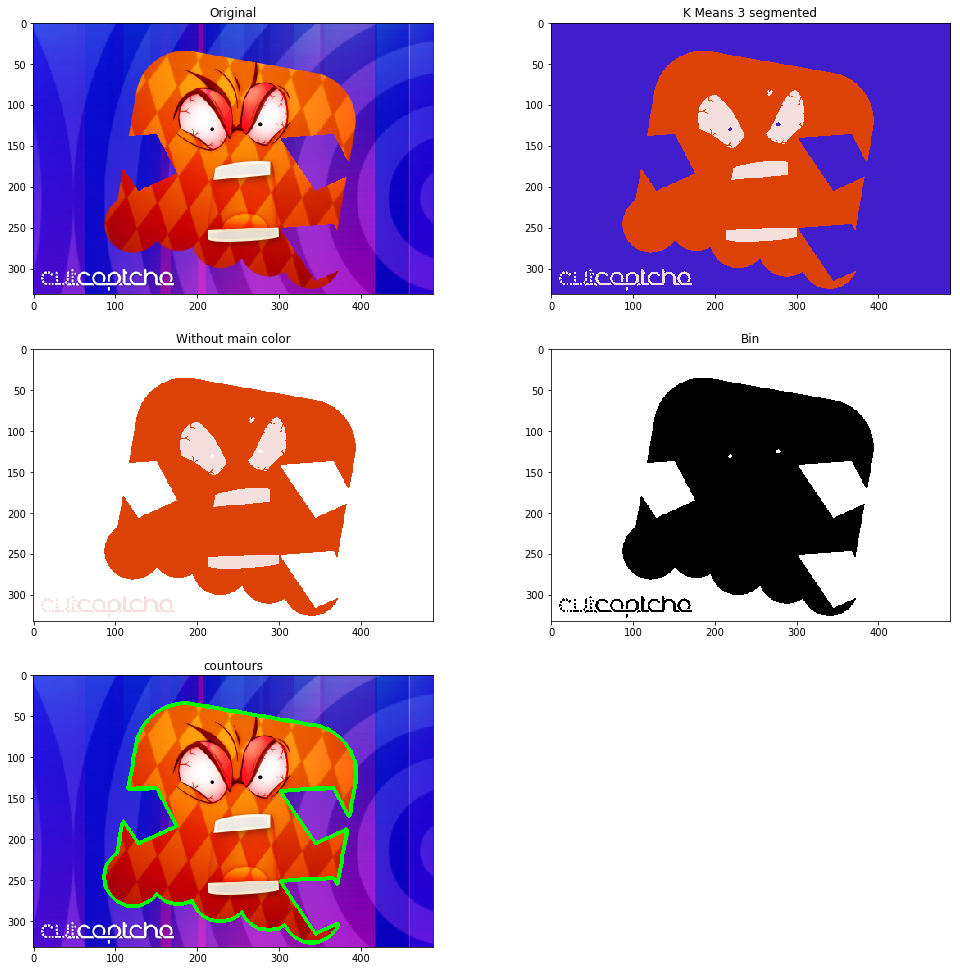

In [68]:
orig, pixels = get_one() #'e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6'
fig=plt.figure(figsize=(17, 17))

ax =fig.add_subplot(3, 2, 1)
plt.imshow(orig)
ax.title.set_text('Original')


segmented = kmeans(pixels, 3)
back = segmented.reshape(orig.shape)

ax =fig.add_subplot(3, 2, 2)
plt.imshow(back)
ax.title.set_text('K Means 3 segmented')


clrs, cnt = np.unique(segmented, axis=0, return_counts=True)
main_color = clrs[cnt.argmax()]
rem = back.copy()
rem[np.where((rem == main_color).all(axis=2))] = [255, 255, 255]

rem[np.where((rem == rem[2][2]).all(axis=2))] = [255, 255, 255]

ax =fig.add_subplot(3, 2, 3)
plt.imshow(rem)
ax.title.set_text('Without main color')


imgray = cv2.cvtColor(rem, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(imgray, 254, 255, 0)

ax =fig.add_subplot(3, 2, 4)
plt.imshow(thresh, cmap='gray')
ax.title.set_text('Bin')



contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

out = orig.copy()
for cont, hier in zip(contours, hierarchy[0]):
    #print('Contour: ', cont.shape, hier)
    if cont.shape[0] > 55 and hier[2] >= 0:
        cv2.drawContours(out, [cont], 0, (0,255,0), 3)
        
ax =fig.add_subplot(3, 2, 5)
plt.imshow(out)
ax.title.set_text('countours')

plt.show()

### Binary masks for parts

Alles was nicht transparent ist wird schwarz, der rest weiß

In [ ]:
p0, p1, p2 = get_parts('e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6')

_, mask0 = cv2.threshold(p0[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)
print(mask0.shape)
_, mask1 = cv2.threshold(p1[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)
print(mask1.shape)
_, mask2 = cv2.threshold(p2[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)
print(mask2.shape)

fig2=plt.figure(figsize=(16, 16))
fig2.add_subplot(2, 3, 1)
plt.imshow(p0)
fig2.add_subplot(2, 3, 2)
plt.imshow(p1)
fig2.add_subplot(2, 3, 3)
plt.imshow(p2)
fig2.add_subplot(2, 3, 4)
plt.imshow(mask0, cmap='gray')
fig2.add_subplot(2, 3, 5)
plt.imshow(mask1, cmap='gray')
fig2.add_subplot(2, 3, 6)
plt.imshow(mask2, cmap='gray')



[+] Trying image e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6...
[+] Clustering with 3...
[+] Trying image e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6...


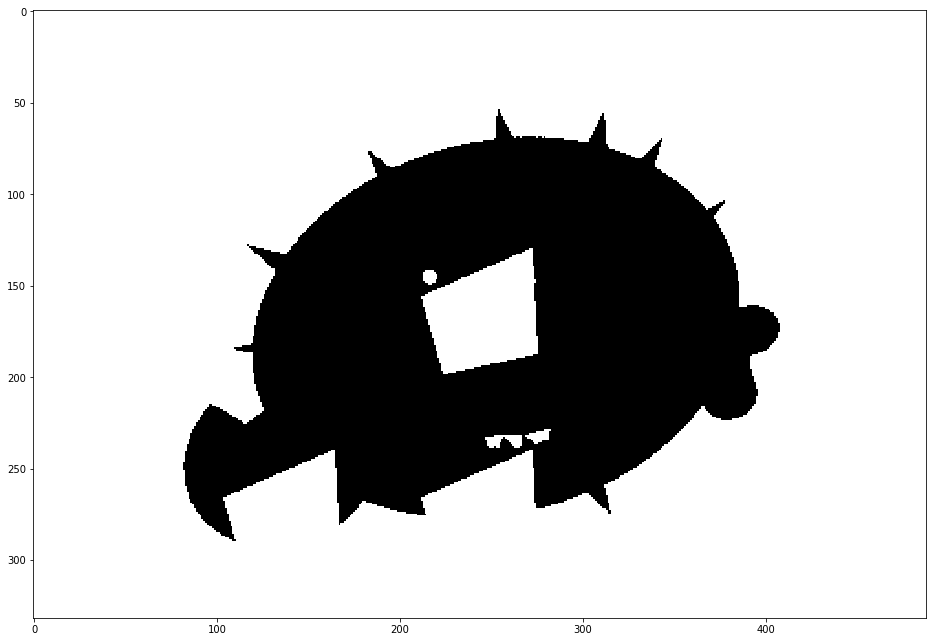

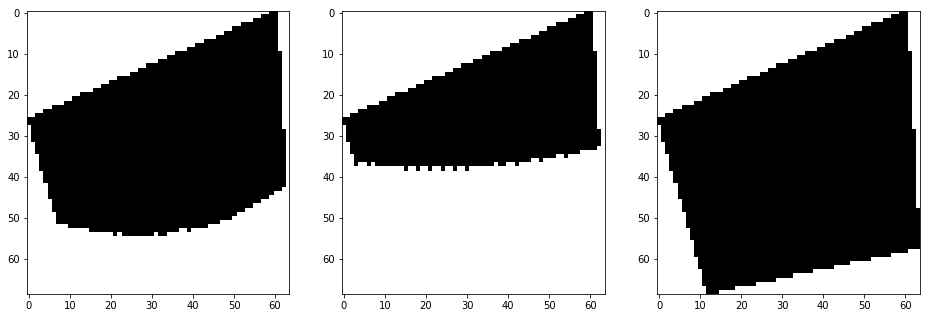

I: 332x488 T: 69x64, Result R will be 264x425


In [59]:
orig, pixels = get_one('e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6')

segmented = kmeans(pixels, 3)
back = segmented.reshape(orig.shape)

clrs, cnt = np.unique(segmented, axis=0, return_counts=True)
main_color = clrs[cnt.argmax()]
rem = back.copy()
rem[np.where((rem == main_color).all(axis=2))] = [255, 255, 255]

rem[np.where((rem == rem[2][2]).all(axis=2))] = [255, 255, 255]

imgray = cv2.cvtColor(rem, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(imgray, 254, 255, 0)

p0, p1, p2 = get_parts('e970dcde-0f5e-4c7e-b8c8-c2f3bacd12f6')

_, m0 = cv2.threshold(p0[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)
_, m1 = cv2.threshold(p1[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)
_, m2 = cv2.threshold(p2[:, :, 3], 0, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(16, 16))
plt.imshow(thresh, cmap='gray')

fig=plt.figure(figsize=(16, 10))

fig.add_subplot(1, 3, 1)
plt.imshow(m0, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(m1, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(m2, cmap='gray')

plt.show()

W, H = thresh.shape
w, h = m0.shape

print(f'I: {W}x{H} T: {w}x{h}, Result R will be {W - w + 1}x{H - h + 1}')

R = np.zeros((W - w + 1, H - h + 1))

for column in range(50, R.shape[0] - 30):
    for row in range(60, R.shape[1] - 40):     
        if thresh[column][row] == 0:
            continue
        print(f'{column}x{row}')
            

In [ ]:
R = np.zeros((8, 7))

for column in range(R.shape[0]):
    for row in range(R.shape[1]):
        print(f'{column}x{row}')